In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are only 3 unique species in the dataset.

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values for any attribute

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

There is only one Categorical feature (Species)
Let's convert it to the Numerical feature

In [1]:
 species_map = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3}
 df['Species'] = df['Species'].map(species_map)

NameError: name 'df' is not defined

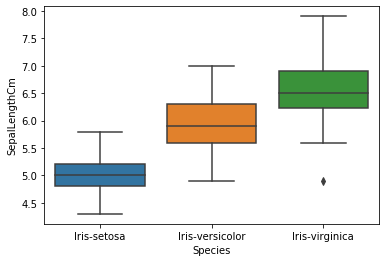

In [7]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)

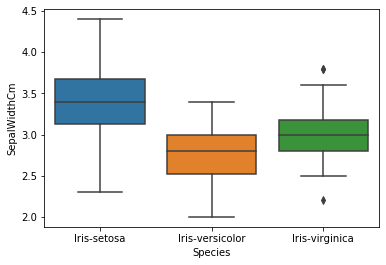

In [8]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df)

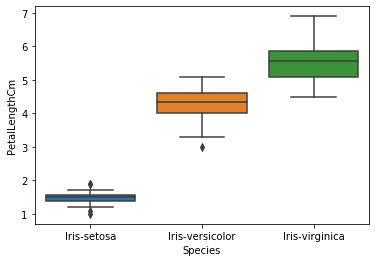

In [9]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)

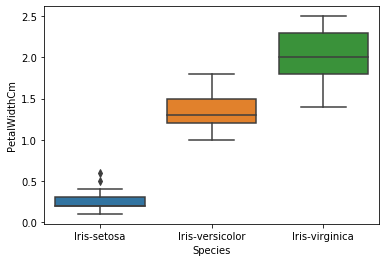

In [10]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df)

In [11]:
df.groupby('Species')['PetalLengthCm'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

,Species,mean,median,min,max,std
0,Iris-setosa,1.464,1.50,1.0,1.9,0.173511
1,Iris-versicolor,4.260,4.35,3.0,5.1,0.469911
2,Iris-virginica,5.552,5.55,4.5,6.9,0.551895


In [40]:
def get_outliers(df, column, species):
    subset_df = df[df['Species'] == species]
    Q1 = subset_df[column].quantile(0.25)
    Q3 = subset_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = subset_df[(subset_df[column] <= lower_bound) | (subset_df[column] >= upper_bound)][column].tolist()
    return outliers


In [41]:
print(get_outliers(df,'PetalLengthCm', 'Iris-setosa'))

[1.1, 1.0, 1.9, 1.9]


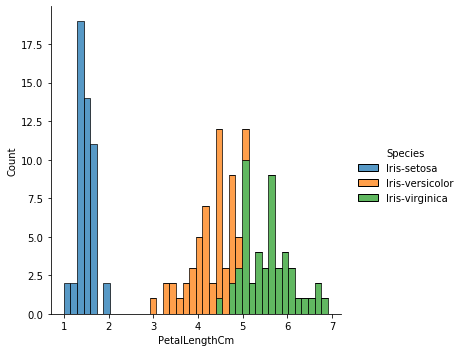

In [60]:
sns.displot(x='PetalLengthCm',hue='Species',data=df,kde=False, bins=40, multiple='stack')

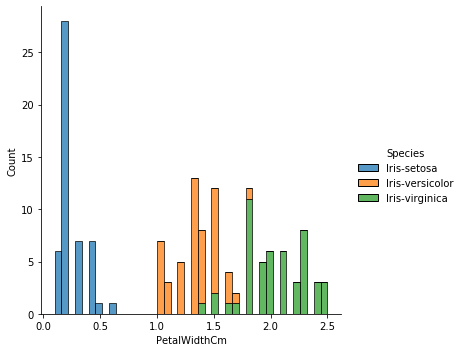

In [61]:
sns.displot(x='PetalWidthCm',hue='Species',data=df,kde=False, bins=40, multiple='stack')

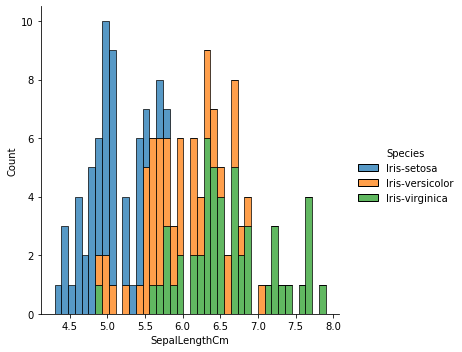

In [55]:
sns.displot(x='SepalLengthCm',hue='Species',data=df,kde=False, bins=40,multiple="stack")

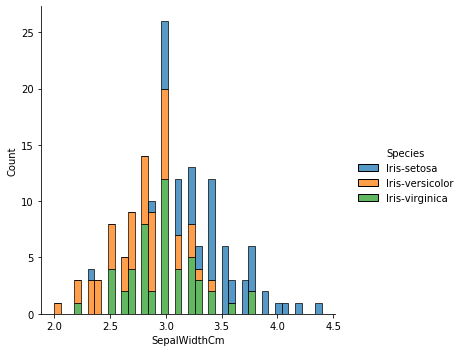

In [54]:
sns.displot(x='SepalWidthCm',hue='Species',data=df,kde=False, bins=40,multiple="stack")

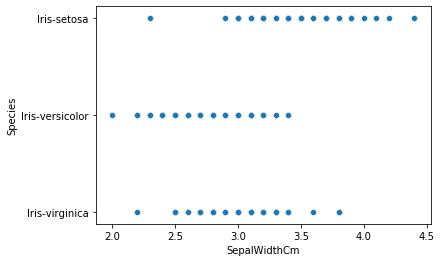

In [59]:
sns.scatterplot(data=df, x='SepalWidthCm', y='Species')

### Analysis
1) There are zero null value attributes
2) There are only 3 unique species in the dataset ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
3) Outliers are present for the:
   - SepalLengthCm - Iris-virginica
   - SepalWidthCm - Iris-virginica
   - PetalLengthCm - Iris-setosa
   - PetalWidthCm - Iris-setosa
4) No outliers present for the specie 'Iris-versicolor' for any attribute